# Capstone Project - Bank Customer Churn Prediction (Week 2)
### Applied Data Science Capstone by IBM/Coursera

This notebook will be mainly used for the capstone project as part of the Applied Data Science Capstone course availeble in the cousera plataform

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project, we will try to predict whether a particular customer at a bank branch will leave the bank or not. Specifically, this report will be directed to the bank's management so that it can take steps to ensure that customers appointed with the potential to leave the bank give up on this idea.

As is known, it is much more expensive to sign in a new client than keeping an existing one. It is advantageous for banks to know what leads a client towards the decision to leave the company. Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* Credit Score;
* Geography;
* Gender;
* Age;
* Tenure;
* Balance;
* Num Of Products;
* Has Credit Card;
* Is an Active Member;
* Estimated Salary.


Following data sources was extracted from the kaggle database.:

The dataset is Churn for Bank Customers and the content is:

* RowNumber—corresponds to the record (row) number and has no effect on the output.
* CustomerId—contains random values and has no effect on customer leaving the bank.
* Surname—the surname of a customer has no impact on their decision to leave the bank.
* CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
* Geography—a customer’s location can affect their decision to leave the bank.
* Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
* Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
* Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
* Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
* NumOfProducts—refers to the number of products that a customer has purchased through the bank.
* HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
* IsActiveMember—active customers are less likely to leave the bank.
* EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* Exited—whether or not the customer left the bank.


#### Importing libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

In [2]:
# csv file to be used
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9b238d4e37124c9a9cef5d73459032c0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='95LKbkvfJiE-GeJtmM62FiujCgGzGAW12FN1qudVOPjp',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_9b238d4e37124c9a9cef5d73459032c0.get_object(Bucket='githubaccountfortheproject-donotdelete-pr-d5ko5cyanzxu76',Key='churn.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Exploratory Data Analysis

In [3]:
print(dataset.columns)
print(dataset.shape)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
(10000, 14)


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


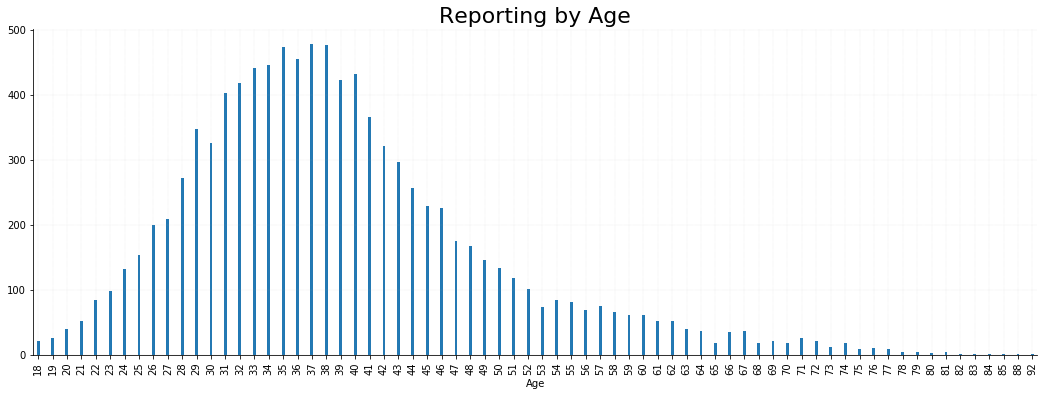

In [10]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(18,6))
dataset.groupby('Age').size().plot(kind = 'bar',
                                 linewidth = 0.5,
                                 width = 0.2,
                                 align = 'center')
ax1.set_title('Reporting by Age', fontsize=22)
ax1.grid(linestyle=':', linewidth = '0.2')
ax1.spines['left'].set_visible(True)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(True);

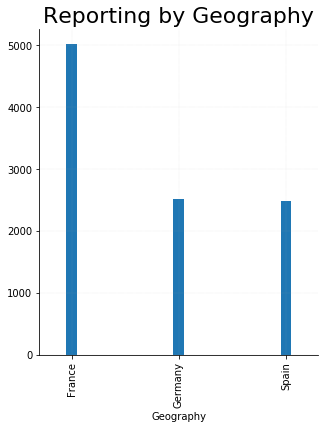

In [14]:
fig2, ax2 = plt.subplots(figsize=(5,6))
dataset.groupby('Geography').size().plot(kind = 'bar',
                                 linewidth = 0.5,
                                 width = 0.1,
                                 align = 'center')
ax2.set_title('Reporting by Geography', fontsize=22)
ax2.grid(linestyle=':', linewidth = '0.2')
ax2.spines['left'].set_visible(True)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(True);

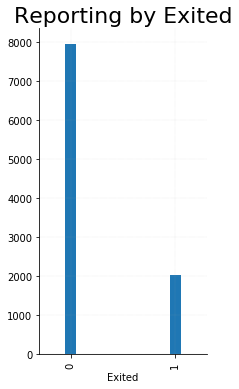

In [17]:
fig2, ax2 = plt.subplots(figsize=(3,6))
dataset.groupby('Exited').size().plot(kind = 'bar',
                                 linewidth = 0.5,
                                 width = 0.1,
                                 align = 'center')
ax2.set_title('Reporting by Exited', fontsize=22)
ax2.grid(linestyle=':', linewidth = '0.2')
ax2.spines['left'].set_visible(True)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(True);

## Methodology <a name="methodology"></a>

As the problem is a classification problem, whether or not the customer will leave the bank, the following models were considered:

* Logistic Regression
* K-Nearest Neighbors (K-NN)
* Support Vector Machine (SVM)
* Kernel SVM
* Naive Bayes
* Decision Tree Classification
* Random Forest Classification

Each of them will be applied to the data set (75% for training and 25% for testing), so that the precision and processing speed of each one of them was evaluated to choose the one that best solves the problem.

## Analysis <a name="analysis"></a>

Data pre-processing

In [22]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [23]:
# Encoding categorical data
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)


[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167  0.97024255
   0.02188649]
 [-1.00280393 -0.57873591  1.74273971 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
  -1.07636976]]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Logistic Regression

In [26]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1901   90]
 [ 393  116]]


0.8068

K-Nearest Neighbors (K-NN)

In [29]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1860  131]
 [ 298  211]]


0.8284

Support Vector Machine (SVM)

In [35]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [37]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1991    0]
 [ 509    0]]


0.7964

Kernel SVM

In [38]:
# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [40]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1934   57]
 [ 287  222]]


0.8624

Naive Bayes

In [41]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [43]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1823  168]
 [ 308  201]]


0.8096

Decision Tree Classification

In [44]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [45]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,  accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1737  254]
 [ 249  260]]


0.7988

Random Forest Classification

In [59]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [60]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [61]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix ,  accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1914   77]
 [ 277  232]]


0.8584

## Results and Discussion <a name="results"></a>

Assuming the classification algorithms it was noticed that they have an accuracy between 0.7964 and 0.8624 which is not a bad value for the proposed problem. In this way, regardless of the algorithm used, the bank would have a good hit rate to direct measures that convince customers to stay at the branch, which would reduce spending if these strategies were used for all customers.

## Conclusion <a name="conclusion"></a>

Finally, the prediction will be indicated using the SVM Kernel algorithm which obtained an accuracy of 86.24%. The rate of false positives was 12.92% and false negatives 20.43%, which was the lowest among the tested algorithms.